# Visualisation and Interactivity improvements
## Objectives
* Complete write function that takes ODC xarray output and converts it to RGBA colormap whilst accounting for single bands
* Integrate reprojection to web mercator in function
* Consider how to get sidecar / ipyleaflet to auto update instead of creating new tabs
* Add transparency slider

In [181]:
import odc.algo
import odc.ui
from datacube import Datacube
from ipyleaflet import Map, ImageOverlay, Velocity
import datacube
import sys
import xarray as xr
import numpy as np
from typing import Tuple, Optional, List
from sidecar import Sidecar
from ipywidgets import IntSlider
from matplotlib import cm
import matplotlib.pyplot as plt
from IPython.display import Image, display
from matplotlib.colors import Normalize

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sys.path.append('Scripts')
from dea_datahandling import load_ard
from dea_plotting import rgb
from dea_plotting import display_map

In [ ]:
def colorise(data, cmap='viridis', vmin=None, vmax=None, bytes=True):
    from matplotlib import cm
    from matplotlib.colors import Normalize
    """
    Convert single band xarray to colormap values
    Normalises values in process
    Can accept multiple time steps
    """
    return cm.get_cmap(cmap)(Normalize(vmin=vmin, vmax=vmax)(data), bytes=bytes)

In [35]:
dc = Datacube(app='viz')

In [112]:
# Load data
query = {
    'x': (153.33, 153.425),
    'y': (-27.60, -27.665),
    'time': ('2018'),
    'output_crs': 'EPSG:3857',
    'resolution': (-30, 30),
    'group_by': 'solar_day'
}


ds = dc.load(product = 'ls8_nbart_geomedian_annual', **query)

print(ds)

<xarray.Dataset>
Dimensions:  (time: 1, x: 354, y: 273)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01
  * y        (y) float64 -3.199e+06 -3.199e+06 ... -3.207e+06 -3.207e+06
  * x        (x) float64 1.707e+07 1.707e+07 1.707e+07 ... 1.708e+07 1.708e+07
Data variables:
    blue     (time, y, x) int16 485 478 490 492 486 503 ... 239 270 273 289 298
    green    (time, y, x) int16 557 547 549 536 525 536 ... 364 408 402 413 429
    red      (time, y, x) int16 404 385 335 281 263 254 ... 318 362 344 363 381
    nir      (time, y, x) int16 166 153 128 108 109 ... 2278 2469 2269 2341 2314
    swir1    (time, y, x) int16 89 81 68 57 56 56 ... 983 1160 1115 1116 1163
    swir2    (time, y, x) int16 71 63 51 44 44 44 48 ... 495 448 544 518 528 566
Attributes:
    crs:      EPSG:3857


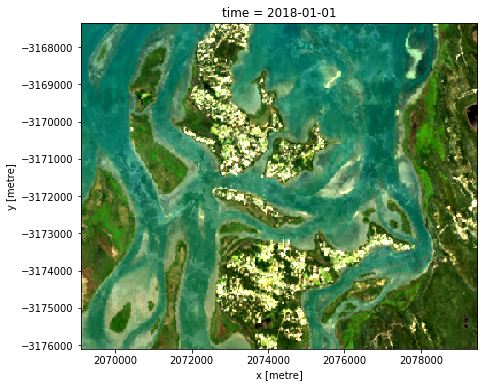

In [85]:
rgb(ds, bands=['red', 'green', 'blue'])

In [223]:
# Select single band
da = ds.blue.data

In [224]:
# Colorise!
da = colorise(da)

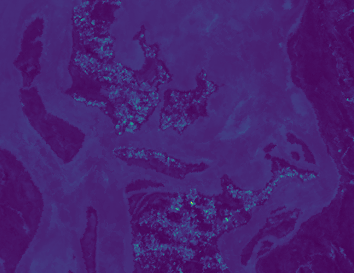

In [225]:
# View image as png data
Image(data = odc.ui.to_png_data(da[0]))

In [226]:
# Convert to png data
out = odc.ui.to_png_data(da[0])
# Convert to URL
out = odc.ui.mk_data_uri(out)
# Extract the bounds from initial query
# These are needed to georeference image
bounds = odc.ui._images.xr_bounds(ds)

In [227]:
sc = Sidecar(title='Sidecar Output')
# sl = IntSlider(description='Some slider')
m = Map(center=(query['y'][0], query['x'][0]), zoom=9)

# Add layer to map

m.add_layer(ImageOverlay(url=out, bounds= bounds))

with sc:
    # plotting happens here
    display(m)